# Importing Necessary Libraries 

In [1]:
# import necessary libraries 
import os
import pandas as pd
from collections import Counter

# Load the datasets and Mergeing 

In [2]:
files = [
    "/Users/luffy_015/Desktop/Agriculture/dxm437/Data/Price/2016.csv",
    "/Users/luffy_015/Desktop/Agriculture/dxm437/Data/Price/2017.csv",
    "/Users/luffy_015/Desktop/Agriculture/dxm437/Data/Price/2018.csv",
    "/Users/luffy_015/Desktop/Agriculture/dxm437/Data/Price/2019.csv",
    "/Users/luffy_015/Desktop/Agriculture/dxm437/Data/Price/2020.csv",
    "/Users/luffy_015/Desktop/Agriculture/dxm437/Data/Price/2021.csv",
    "/Users/luffy_015/Desktop/Agriculture/dxm437/Data/Price/2022.csv",
    "/Users/luffy_015/Desktop/Agriculture/dxm437/Data/Price/2023.csv",
    "/Users/luffy_015/Desktop/Agriculture/dxm437/Data/Price/2024.csv"
]

# renames for the price columns
PRICE_RENAME = {
    "Minimum Price For The Commodity In The Market (UOM:INR(IndianRupees)), Scaling Factor:1": "Min_Price",
    "Maximum Price For The Commodity In The Market (UOM:INR(IndianRupees)), Scaling Factor:1": "Max_Price",
    "Modal Price For The Commodity (UOM:INR(IndianRupees)), Scaling Factor:1": "Modal_Price",
}

KEEP_COLS = [
    "State", "District", "Market Name", "Commodity Name", "Variety Of Commodities",
    "Year", "Min_Price", "Max_Price", "Modal_Price"
]

def clean_one_file(path):
    year = int(os.path.basename(path).split('.')[0])
    df = pd.read_csv(path)

    # strip all column names and values in object columns
    df.columns = df.columns.str.strip()
    obj_cols = df.select_dtypes(include="object").columns
    for c in obj_cols:
        df[c] = df[c].astype(str).str.strip().str.replace(r"\s+", " ", regex=True)

    # rename long price columns before concat
    df = df.rename(columns=PRICE_RENAME)

    # keep a traceable year
    df["Year"] = year

    # price cols to numeric
    for c in ["Min_Price", "Max_Price", "Modal_Price"]:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")

    return df

# Load & concat
parts = [clean_one_file(p) for p in files]
merged_df = pd.concat(parts, ignore_index=True)

# drop duplicated columns if any
merged_df = merged_df.loc[:, ~merged_df.columns.str.contains(r"\.1$")]

# keep only needed columns that exist
cols_to_use = [c for c in KEEP_COLS if c in merged_df.columns]
df = merged_df[cols_to_use].copy()

In [3]:
df['District'] = df['District'].astype(str).str.strip()
df

,State,District,Market Name,Commodity Name,Variety Of Commodities,Year,Min_Price,Max_Price,Modal_Price
0,Andhra Pradesh,Anantapur,Kalyandurg,Tamarind Fruit,Non A/c Fine,2016,12000.0,12000.0,12000.0
1,Andhra Pradesh,Anantapur,Kalyandurg,Tamarind Fruit,Non A/c Flower,2016,6500.0,6500.0,6500.0
2,Andhra Pradesh,Anantapur,Madakasira,Tamarind Fruit,Non A/c Flower,2016,5200.0,5800.0,5500.0
3,Andhra Pradesh,Anantapur,Tenakallu,Ground Nut Seed,Ground Nut Seed,2016,7800.0,7800.0,7800.0
4,Andhra Pradesh,Anantapur,Hindupur,Tamarind Fruit,With Seed 1Variety,2016,2000.0,3000.0,2500.0
...,...,...,...,...,...,...,...,...,...
22297469,Kerala,Kollam,Chathanoor,Cabbage,Other,2024,5800.0,6200.0,6000.0
22297470,Kerala,Kollam,Chathanoor,Brinjal,Other,2024,5800.0,6200.0,6000.0
22297471,Kerala,Kollam,Chathanoor,Bitter gourd,Other,2024,5800.0,6200.0,6000.0
22297472,Kerala,Kollam,Chathanoor,Bhindi(Ladies Finger),Other,2024,4800.0,5200.0,5000.0


In [4]:
# Checking for missing Values 
df.isnull().sum()

State                     0
District                  0
Market Name               0
Commodity Name            0
Variety Of Commodities    0
Year                      0
Min_Price                 0
Max_Price                 0
Modal_Price               0
dtype: int64

In [5]:
# Description 
df.describe()

,Year,Min_Price,Max_Price,Modal_Price
count,2.229747e+07,2.229747e+07,2.229747e+07,2.229747e+07
mean,2.018609e+03,3.114172e+03,3.708460e+03,3.475798e+03
std,2.220550e+00,1.944328e+05,1.956273e+05,1.944752e+05
min,2.016000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.017000e+03,1.200000e+03,1.500000e+03,1.400000e+03
50%,2.018000e+03,2.000000e+03,2.500000e+03,2.350000e+03
75%,2.019000e+03,3.800000e+03,4.300000e+03,4.050000e+03
max,2.024000e+03,9.175885e+08,9.175885e+08,9.175885e+08


In [6]:
# Crops Grown per State 
df['Commodity Name'].value_counts()
df['State'].value_counts()

State
Uttar Pradesh                  4340472
Kerala                         2279808
Maharashtra                    1864820
Punjab                         1782192
Madhya Pradesh                 1720339
Gujarat                        1437320
Rajasthan                      1224087
Haryana                        1078740
Karnataka                       955803
West Bengal                     879982
Odisha                          757334
Tamil Nadu                      703693
Telangana                       482682
Himachal Pradesh                472620
Chhattisgarh                    393096
Andhra Pradesh                  358881
Uttarakhand                     264676
Jharkhand                       231842
Tripura                         192770
Delhi                           177802
Jammu And Kashmir               173326
Assam                           172773
Bihar                           105196
Manipur                          62499
Meghalaya                        50333
Goa                

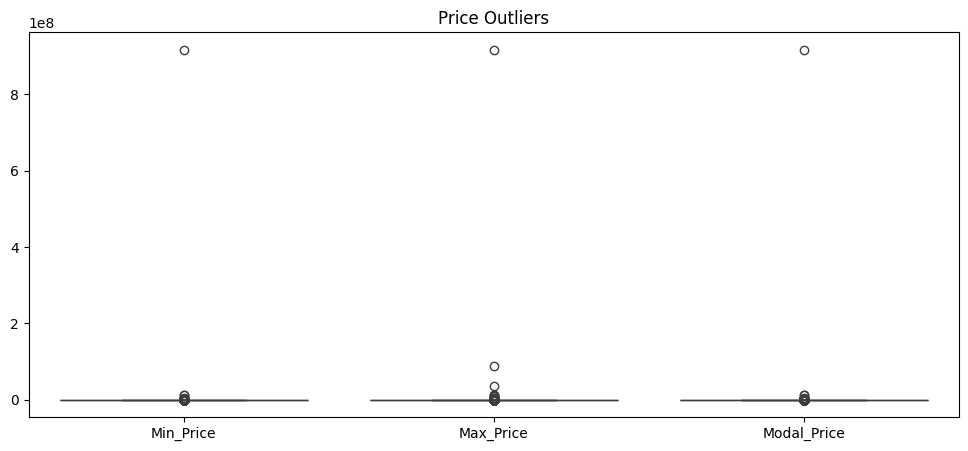

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Veiwing Outliers
plt.figure(figsize=(12,5))
sns.boxplot(data=df[['Min_Price', 'Max_Price', 'Modal_Price']])
plt.title("Price Outliers")
plt.show()

In [8]:
# Ensure numeric price columns
price_cols = ['Min_Price', 'Max_Price', 'Modal_Price']
for c in price_cols:
    df[c] = (df[c].astype(str).str.replace(',', '', regex=False))
    df[c] = pd.to_numeric(df[c], errors='coerce')

# Basic rules
df = df.dropna(subset=price_cols)
df = df[(df['Min_Price'] >= 0) & (df['Max_Price'] >= 0) & (df['Modal_Price'] >= 0)]
df = df[(df['Min_Price'] <= df['Modal_Price']) & (df['Modal_Price'] <= df['Max_Price'])]

# check any column above price 100,000,000
th = 1e5
outliers_global = df[(df[price_cols] > th).any(axis=1)]
print(f"{th:.0f}>: {len(outliers_global)} rows")
display(outliers_global.head())

# Commodity-wise robust outlier flag 
def flag_outliers_per_commodity(g, q=0.999):
    caps = g[price_cols].quantile(q)
    mask = (g['Min_Price'] > caps['Min_Price']) | \
           (g['Max_Price'] > caps['Max_Price']) | \
           (g['Modal_Price'] > caps['Modal_Price'])
    return g.assign(_is_outlier=mask)

df_flagged = (df.groupby('Commodity Name', group_keys=False)
                .apply(flag_outliers_per_commodity, q=0.999))

outliers = df_flagged[df_flagged['_is_outlier']]
df_cleaned = df_flagged[~df_flagged['_is_outlier']].drop(columns=['_is_outlier'])

print(f"Commodity-wise outliers (99.9th pct): {len(outliers)} rows")
display(outliers.nlargest(10, 'Max_Price')[['Commodity Name','Year','Min_Price','Modal_Price','Max_Price']])

# Double-check the single largest values
for col in price_cols:
    vmax = df_cleaned[col].max()
    idx  = df_cleaned[col].idxmax()
    print(f"Max {col}: {vmax}")
    display(df_cleaned.loc[[idx], ['State','District','Market Name','Commodity Name','Variety Of Commodities','Year',col]])


100000>: 4922 rows


,State,District,Market Name,Commodity Name,Variety Of Commodities,Year,Min_Price,Max_Price,Modal_Price
3600,Kerala,Idukki,Kattappana,Cardamoms,Other,2016,110000.0,120000.0,120000.0
3648,Kerala,Idukki,Thodupuzha,Cardamoms,Other,2016,110000.0,120000.0,120000.0
5929,Maharashtra,Mumbai,Mumbai,Cardamoms,Other,2016,110000.0,120000.0,115000.0
14258,Kerala,Idukki,Thodupuzha,Cardamoms,Other,2016,110000.0,120000.0,120000.0
16373,Maharashtra,Mumbai,Mumbai,Cardamoms,Other,2016,110000.0,120000.0,115000.0


/var/folders/6f/hrr6km6x5l39n_12_r7994t00000gn/T/ipykernel_1274/1305524585.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flag_outliers_per_commodity, q=0.999))


Commodity-wise outliers (99.9th pct): 28058 rows


,Commodity Name,Year,Min_Price,Modal_Price,Max_Price
21402459,Onion,2024,917588483.0,917588483.0,917588483.0
17491944,Black Gram Dal (Urd Dal),2020,0.0,8765.0,88008720.0
9299552,Green Gram (Moong)(Whole),2018,3450.0,4750.0,34505370.0
9241090,Amaranthus,2018,11600000.0,11600000.0,12000000.0
9241193,Potato,2018,11200000.0,11200000.0,12000000.0
7714446,Pomegranate,2017,0.0,8600.0,8648650.0
7720282,Pomegranate,2017,0.0,8600.0,8648650.0
2582341,Bengal Gram(Gram)(Whole),2016,4500.0,4550.0,4600000.0
21519255,Saffron,2024,4000000.0,4000000.0,4000000.0
2749014,Sunflower,2016,3800.0,3800.0,3888800.0


Max Min_Price: 900000.0


,State,District,Market Name,Commodity Name,Variety Of Commodities,Year,Min_Price
7735035,Goa,North Goa,Sanquelim,Coconut,Other,2017,900000.0


Max Max_Price: 1800000.0


,State,District,Market Name,Commodity Name,Variety Of Commodities,Year,Max_Price
7735035,Goa,North Goa,Sanquelim,Coconut,Other,2017,1800000.0


Max Modal_Price: 1275000.0


,State,District,Market Name,Commodity Name,Variety Of Commodities,Year,Modal_Price
8659738,Goa,North Goa,Valpol,Coconut,Coconut,2018,1275000.0


In [9]:
# To get unique commodity from the outliers 
unique_outlier_commodities = df['Commodity Name'].unique()
print("Unique commodities in outliers:")
print(unique_outlier_commodities)

Unique commodities in outliers:
['Tamarind Fruit' 'Ground Nut Seed' 'Tamarind Seed'
 'Bengal Gram(Gram)(Whole)' 'Groundnut' 'Banana - Green'
 'Paddy(Dhan)(Common)' 'Coriander(Leaves)' 'Arhar (Tur/Red Gram)(Whole)'
 'Dry Chillies' 'Sunflower' 'Castor Seed' 'Groundnut (Split)'
 'Gur(Jaggery)' 'Coconut' 'Arecanut(Betelnut/Supari)' 'Tomato' 'Banana'
 'Black Gram (Urd Beans)(Whole)' 'Cashewnuts' 'Copra' 'Cotton' 'Lemon'
 'Turmeric' 'Rice' 'Wood' 'Green Gram (Moong)(Whole)' 'Maize' 'Onion'
 'Sunflower Seed' 'Jowar(Sorghum)' 'Bajra(Pearl Millet/Cumbu)'
 'Ragi (Finger Millet)' 'Potato' 'Sweet Potato' 'Jute' 'Lime' 'Orange'
 'Papaya' 'Groundnut pods (raw)' 'Wheat Atta' 'Mustard'
 'Lentil (Masur)(Whole)' 'Corriander seed' 'Mustard Oil' 'Maida Atta'
 'Wheat' 'Masur Dal' 'Green Gram Dal (Moong Dal)' 'Green Peas'
 'Betal Leaves' 'Bengal Gram Dal (Chana Dal)' 'Beaten Rice'
 'Arhar Dal(Tur Dal)' 'Peas(Dry)' 'Sesamum(Sesame,Gingelly,Til)'
 'Green Chilli' 'Garlic' 'Soyabean' 'Cauliflower' 'Guar' 'Bitte

In [10]:
# Handeling the Outliers 
def clean_price_outliers_adaptive(df):
    cleaned_df = df.copy()
    to_drop = []

    # Commodity groups
    high_value_crops = [
        'Cardamoms', 'Cashewnuts', 'Dry Chillies', 'Arecanut(Betelnut/Supari)',
        'Black pepper', 'Rubber', 'Coffee', 'Saffron', 'Copra',
        'Apple', 'Grapes', 'Pomegranate', 'Cloves', 'Nutmeg'
    ]
    livestock = ['Sheep', 'Goat', 'Ox', 'Calf', 'Hen', 'Cock', 'Egg', 'Pigs', 'She Goat', 'He Buffalo', 'Cow']
    flowers = ['Rose(Loose)', 'Marigold(Calcutta)', 'Lotus', 'Tube Rose(Double)', 'Tube Rose(Single)',
               'Carnation', 'Orchid', 'Gladiolus Cut Flower']
    
    # Manual thresholds for high-value crops
    manual_thresholds = {
        'Cardamoms': 250000, 'Cashewnuts': 150000, 'Dry Chillies': 60000,
        'Arecanut(Betelnut/Supari)': 90000, 'Black pepper': 100000,
        'Rubber': 70000, 'Coffee': 120000, 'Saffron': 100000,
        'Copra': 80000, 'Apple': 100000, 'Grapes': 70000,
        'Pomegranate': 60000, 'Cloves': 100000, 'Nutmeg': 90000
    }

    for crop in df['Commodity Name'].unique():
        crop_data = df[df['Commodity Name'] == crop]

        if crop in manual_thresholds:
            threshold = manual_thresholds[crop]

        elif crop in livestock:
            threshold = crop_data['Modal_Price'].quantile(0.999)

        elif crop in flowers:
            threshold = crop_data['Modal_Price'].quantile(0.999)

        else:
            if len(crop_data) > 200:
                threshold = crop_data['Modal_Price'].quantile(0.995)
            else:
                threshold = crop_data['Modal_Price'].median() * 5  

        mask = crop_data['Modal_Price'] > threshold
        outlier_indices = crop_data[mask].index
        to_drop.extend(outlier_indices)

    print(f"Total to drop: {len(to_drop)} ({len(to_drop)/len(df)*100:.2f}% of data)")
    return cleaned_df.drop(index=to_drop)

# Apply the improved cleaner
df_cleaned = clean_price_outliers_adaptive(df)


Total to drop: 97919 (0.45% of data)


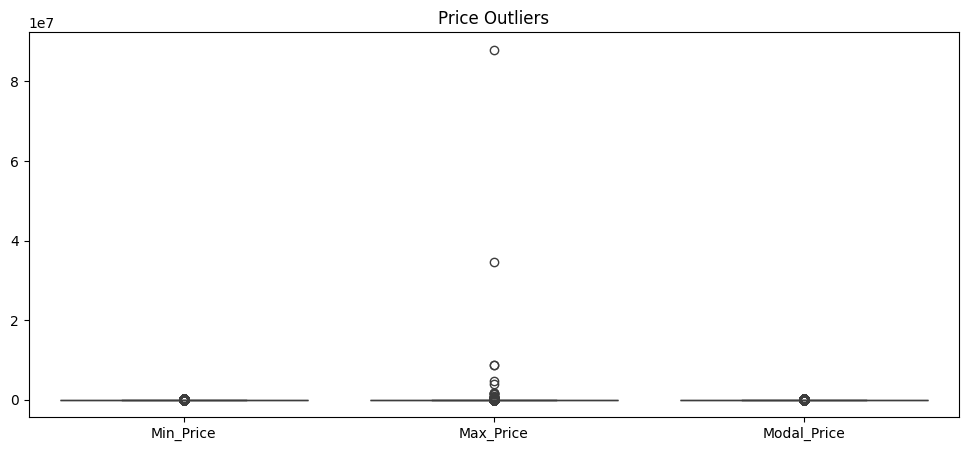

In [11]:
# Veiwing Outliers
plt.figure(figsize=(12,5))
sns.boxplot(data=df_cleaned[['Min_Price', 'Max_Price', 'Modal_Price']])
plt.title("Price Outliers")
plt.show()

In [12]:
# Find the max values
print("Max Min_Price:", df_cleaned['Min_Price'].max())
print("Max Max_Price:", df_cleaned['Max_Price'].max())
print("Max Modal_Price:", df_cleaned['Modal_Price'].max())

# Locate the row(s) with extreme price
df_cleaned[
    (df_cleaned['Min_Price'] == df_cleaned['Min_Price'].max()) |
    (df_cleaned['Max_Price'] == df_cleaned['Max_Price'].max()) |
    (df_cleaned['Modal_Price'] == df_cleaned['Modal_Price'].max())
]


Max Min_Price: 250000.0
Max Max_Price: 88008720.0
Max Modal_Price: 250000.0


,State,District,Market Name,Commodity Name,Variety Of Commodities,Year,Min_Price,Max_Price,Modal_Price
12598113,Kerala,Idukki,Thodupuzha,Cardamoms,Other,2019,220000.0,300000.0,250000.0
12598168,Kerala,Idukki,Nedumkandam,Cardamoms,Other,2019,200000.0,300000.0,250000.0
12611683,Kerala,Idukki,Thodupuzha,Cardamoms,Other,2019,220000.0,300000.0,250000.0
13071528,Kerala,Idukki,Nedumkandam,Cardamoms,Other,2019,180000.0,280000.0,250000.0
13108018,Kerala,Idukki,Nedumkandam,Cardamoms,Other,2019,200000.0,280000.0,250000.0
13509439,Kerala,Idukki,Vandiperiyar,Cardamoms,Other,2019,250000.0,250000.0,250000.0
13600413,Kerala,Idukki,Nedumkandam,Cardamoms,Other,2019,170000.0,300000.0,250000.0
13651859,Kerala,Idukki,Nedumkandam,Cardamoms,Other,2019,180000.0,300000.0,250000.0
13739245,Kerala,Idukki,Nedumkandam,Cardamoms,Other,2019,150000.0,300000.0,250000.0
13797823,Kerala,Idukki,Nedumkandam,Cardamoms,Other,2019,150000.0,280000.0,250000.0


In [13]:
# Handeling the Max_price Outliers 
# Winsorize Max_Price within each commodity-year group
q_low, q_high = 0.005, 0.995

df_cleaned['Max_Price'] = (
    df_cleaned
    .groupby(['Commodity Name','Year'])['Max_Price']
    .transform(lambda x: x.clip(lower=x.quantile(q_low), upper=x.quantile(q_high)))
)

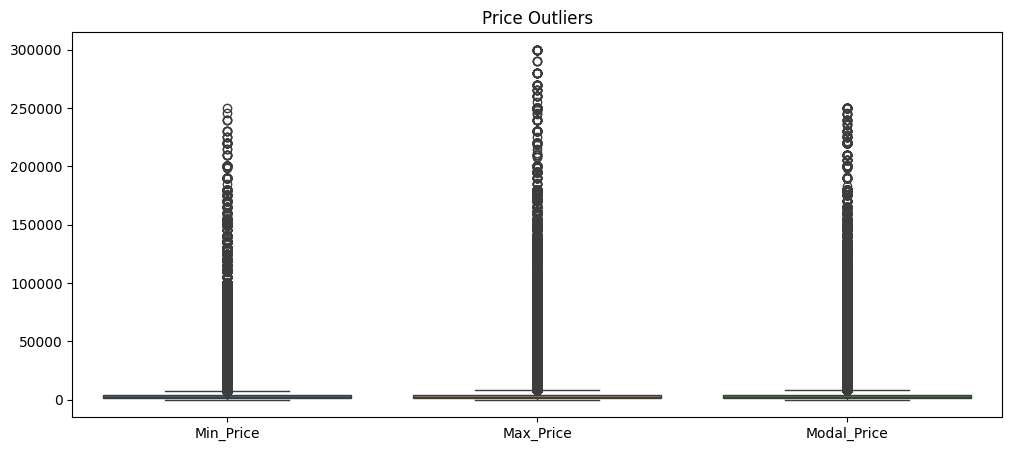

In [14]:
# Veiwing Outliers
plt.figure(figsize=(12,5))
sns.boxplot(data=df_cleaned[['Min_Price', 'Max_Price', 'Modal_Price']])
plt.title("Price Outliers")
plt.show()

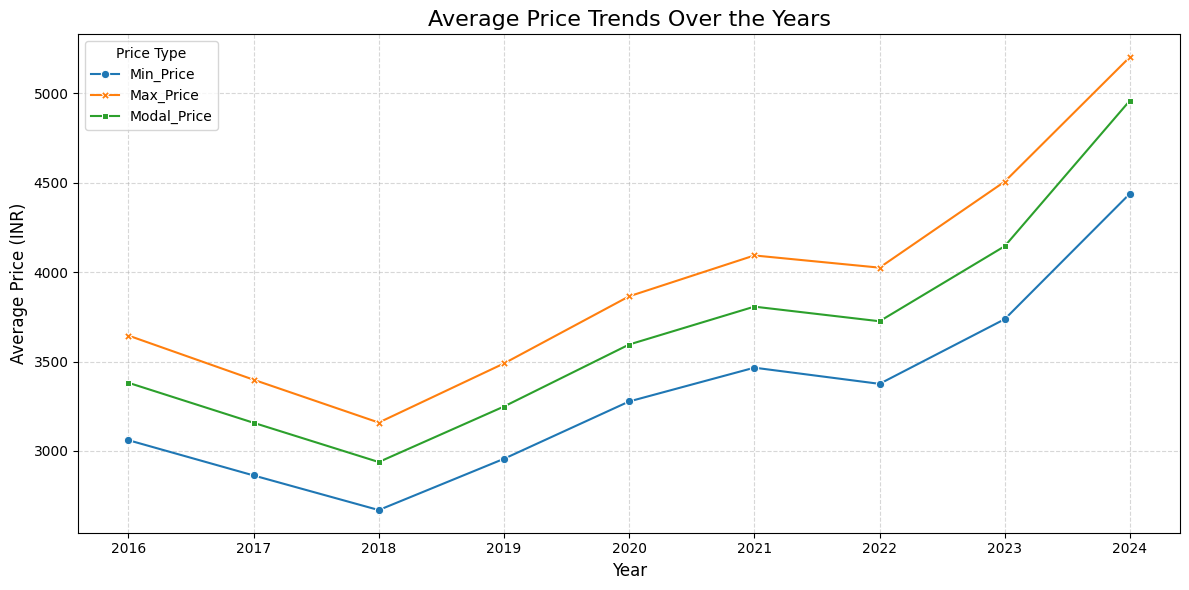

In [15]:
# Ensure 'Year' is integer
df_cleaned['Year'] = df_cleaned['Year'].astype(str)

# Group by Year and calculate average prices
avg_prices = df_cleaned.groupby('Year')[['Min_Price', 'Max_Price', 'Modal_Price']].mean()

# Plot setup
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_prices, markers=True, dashes=False)

plt.title("Average Price Trends Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Price (INR)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Price Type")
plt.tight_layout()
plt.show()


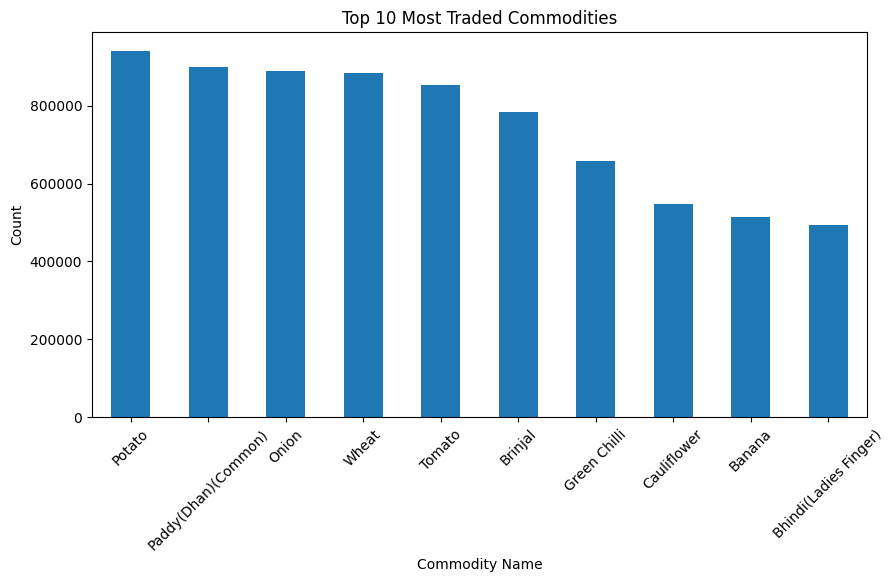

In [16]:
# Top 10 Crops by Occurrence 
df_cleaned['Commodity Name'].value_counts().head(10).plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Most Traded Commodities")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


/var/folders/6f/hrr6km6x5l39n_12_r7994t00000gn/T/ipykernel_1274/4076009762.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=statewise_avg.index, y=statewise_avg.values, palette='viridis')


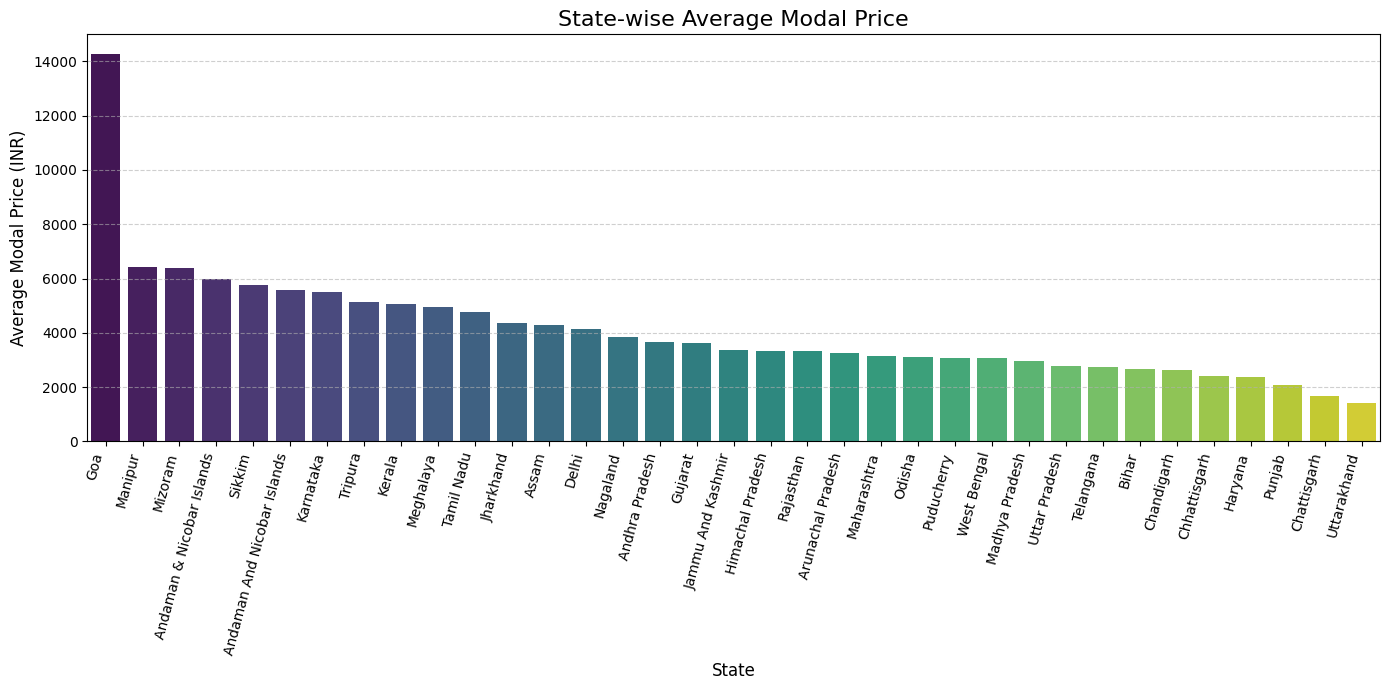

In [17]:
# Group and sort by average Modal Price
statewise_avg = df_cleaned.groupby("State")['Modal_Price'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(x=statewise_avg.index, y=statewise_avg.values, palette='viridis')

plt.title("State-wise Average Modal Price", fontsize=16)
plt.ylabel("Average Modal Price (INR)", fontsize=12)
plt.xlabel("State", fontsize=12)
plt.xticks(rotation=75, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<Axes: >

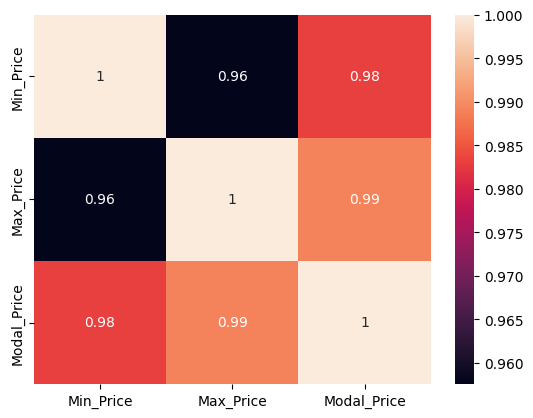

In [18]:
# Correlation Heatmap 
sns.heatmap(df_cleaned[['Min_Price', 'Max_Price', 'Modal_Price',]].corr(), annot=True)

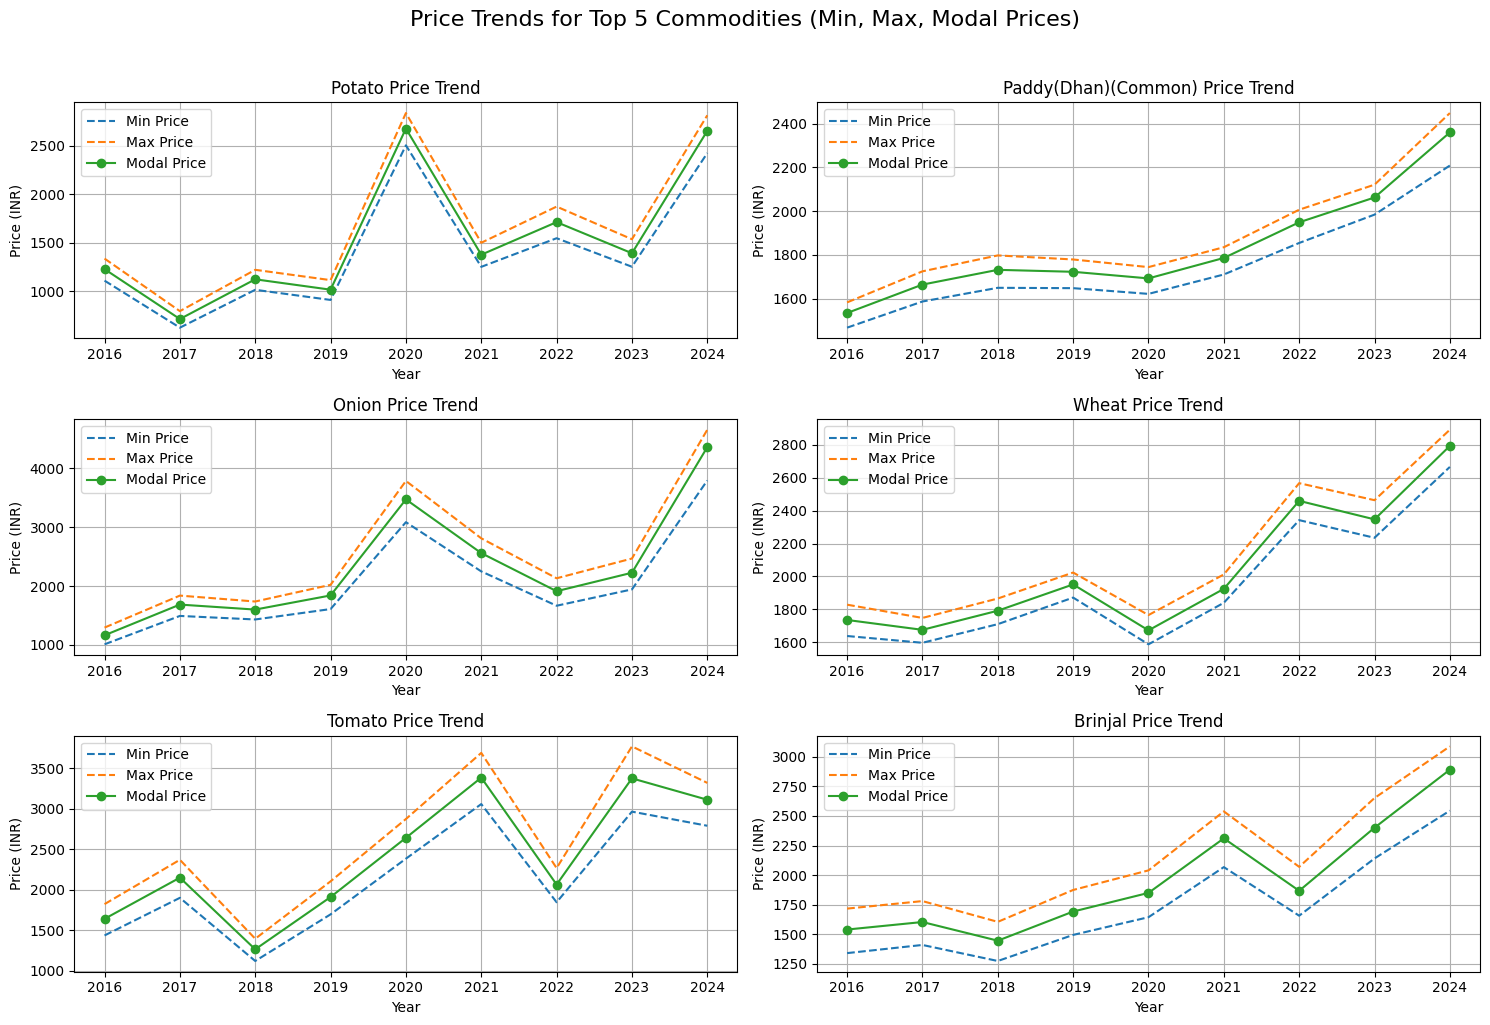

In [19]:
# Find top 5 most frequent commodities
top5_crops = df_cleaned['Commodity Name'].value_counts().nlargest(6).index.tolist()

# Filter for those commodities
df_top5 = df_cleaned[df_cleaned['Commodity Name'].isin(top5_crops)]

# Group by Year and Commodity
price_trends = df_top5.groupby(['Year', 'Commodity Name'])[['Min_Price', 'Max_Price', 'Modal_Price']].mean().reset_index()

# Subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()

# Plot each crop
for i, crop in enumerate(top5_crops):
    ax = axes[i]
    crop_data = price_trends[price_trends['Commodity Name'] == crop]
    
    ax.plot(crop_data['Year'], crop_data['Min_Price'], label='Min Price', linestyle='--')
    ax.plot(crop_data['Year'], crop_data['Max_Price'], label='Max Price', linestyle='--')
    ax.plot(crop_data['Year'], crop_data['Modal_Price'], label='Modal Price', marker='o')
    
    ax.set_title(f"{crop} Price Trend")
    ax.set_xlabel("Year")
    ax.set_ylabel("Price (INR)")
    ax.legend()
    ax.grid(True)

# Hide unused subplot if any
for j in range(len(top5_crops), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Price Trends for Top 5 Commodities (Min, Max, Modal Prices)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


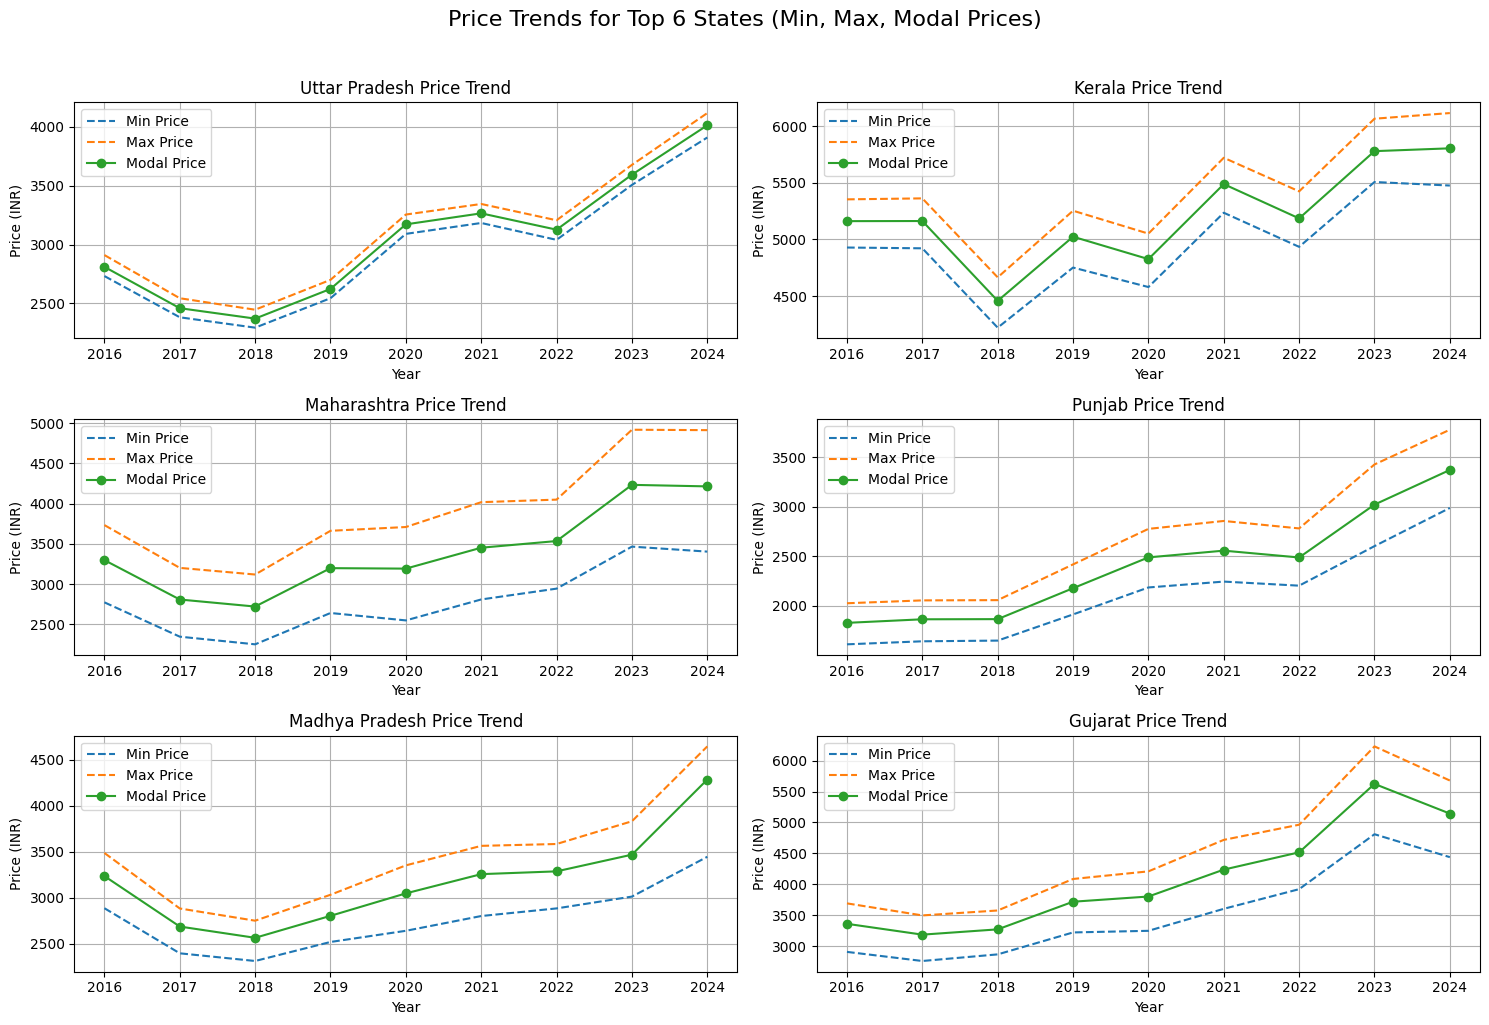

In [20]:
# Find top 6 states by data frequency
top6_states = df_cleaned['State'].value_counts().nlargest(6).index.tolist()

# Filter dataset for those states
df_top6_states = df_cleaned[df_cleaned['State'].isin(top6_states)]

# Group by Year and State
state_trends = df_top6_states.groupby(['Year', 'State'])[['Min_Price', 'Max_Price', 'Modal_Price']].mean().reset_index()

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()

# Plot for each state
for i, state in enumerate(top6_states):
    ax = axes[i]
    state_data = state_trends[state_trends['State'] == state]
    
    ax.plot(state_data['Year'], state_data['Min_Price'], label='Min Price', linestyle='--')
    ax.plot(state_data['Year'], state_data['Max_Price'], label='Max Price', linestyle='--')
    ax.plot(state_data['Year'], state_data['Modal_Price'], label='Modal Price', marker='o')
    
    ax.set_title(f"{state} Price Trend")
    ax.set_xlabel("Year")
    ax.set_ylabel("Price (INR)")
    ax.legend()
    ax.grid(True)

# Remove any unused subplot
for j in range(len(top6_states), len(axes)):
    fig.delaxes(axes[j])


plt.suptitle("Price Trends for Top 6 States (Min, Max, Modal Prices)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


/var/folders/6f/hrr6km6x5l39n_12_r7994t00000gn/T/ipykernel_1274/3848842882.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top6_districts.index, y=top6_districts.values, palette='rocket')


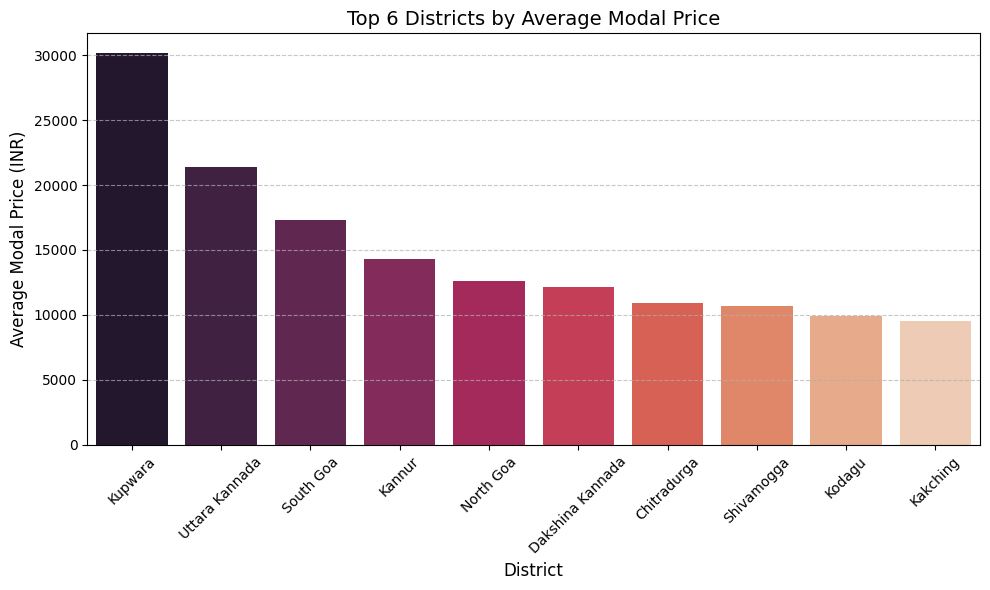

In [21]:
# Group by District and compute average Modal Price
district_avg = df_cleaned.groupby("District")['Modal_Price'].mean()

# Sort and get Top 6
top6_districts = district_avg.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top6_districts.index, y=top6_districts.values, palette='rocket')

plt.title("Top 6 Districts by Average Modal Price", fontsize=14)
plt.ylabel("Average Modal Price (INR)", fontsize=12)
plt.xlabel("District", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/var/folders/6f/hrr6km6x5l39n_12_r7994t00000gn/T/ipykernel_1274/2978289023.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=commodity_variation.values, y=commodity_variation.index, palette='magma')


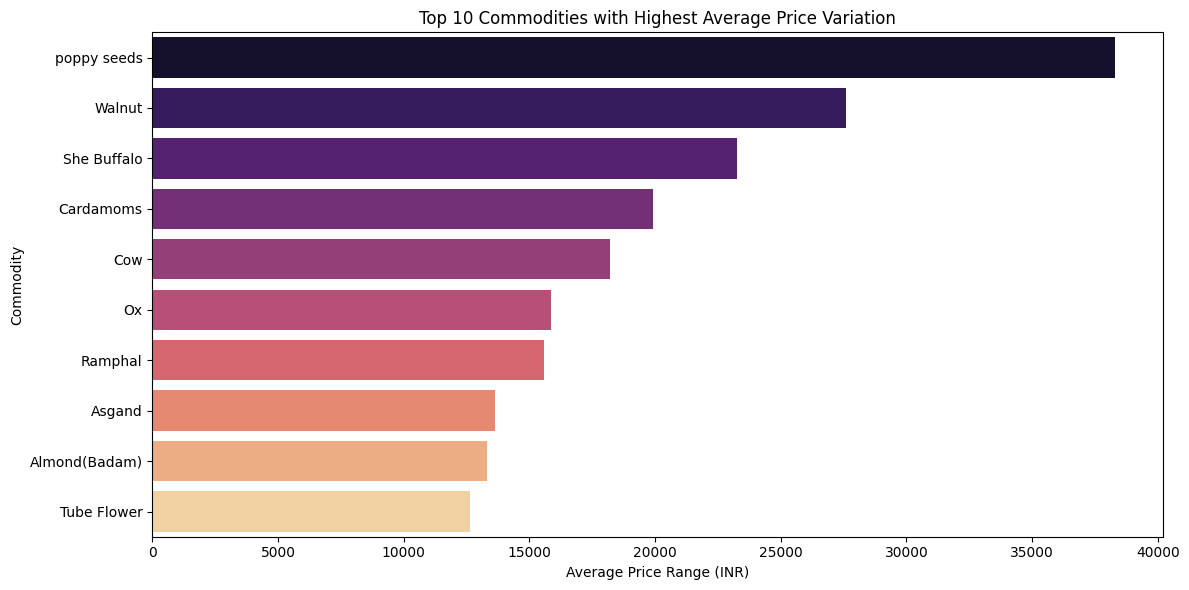

In [22]:
# Calculate price range (Max - Min) per commodity
df_cleaned['Price_Range'] = df_cleaned['Max_Price'] - df_cleaned['Min_Price']

# Group by commodity and take average price range
commodity_variation = df_cleaned.groupby('Commodity Name')['Price_Range'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=commodity_variation.values, y=commodity_variation.index, palette='magma')
plt.title("Top 10 Commodities with Highest Average Price Variation")
plt.xlabel("Average Price Range (INR)")
plt.ylabel("Commodity")
plt.tight_layout()
plt.show()


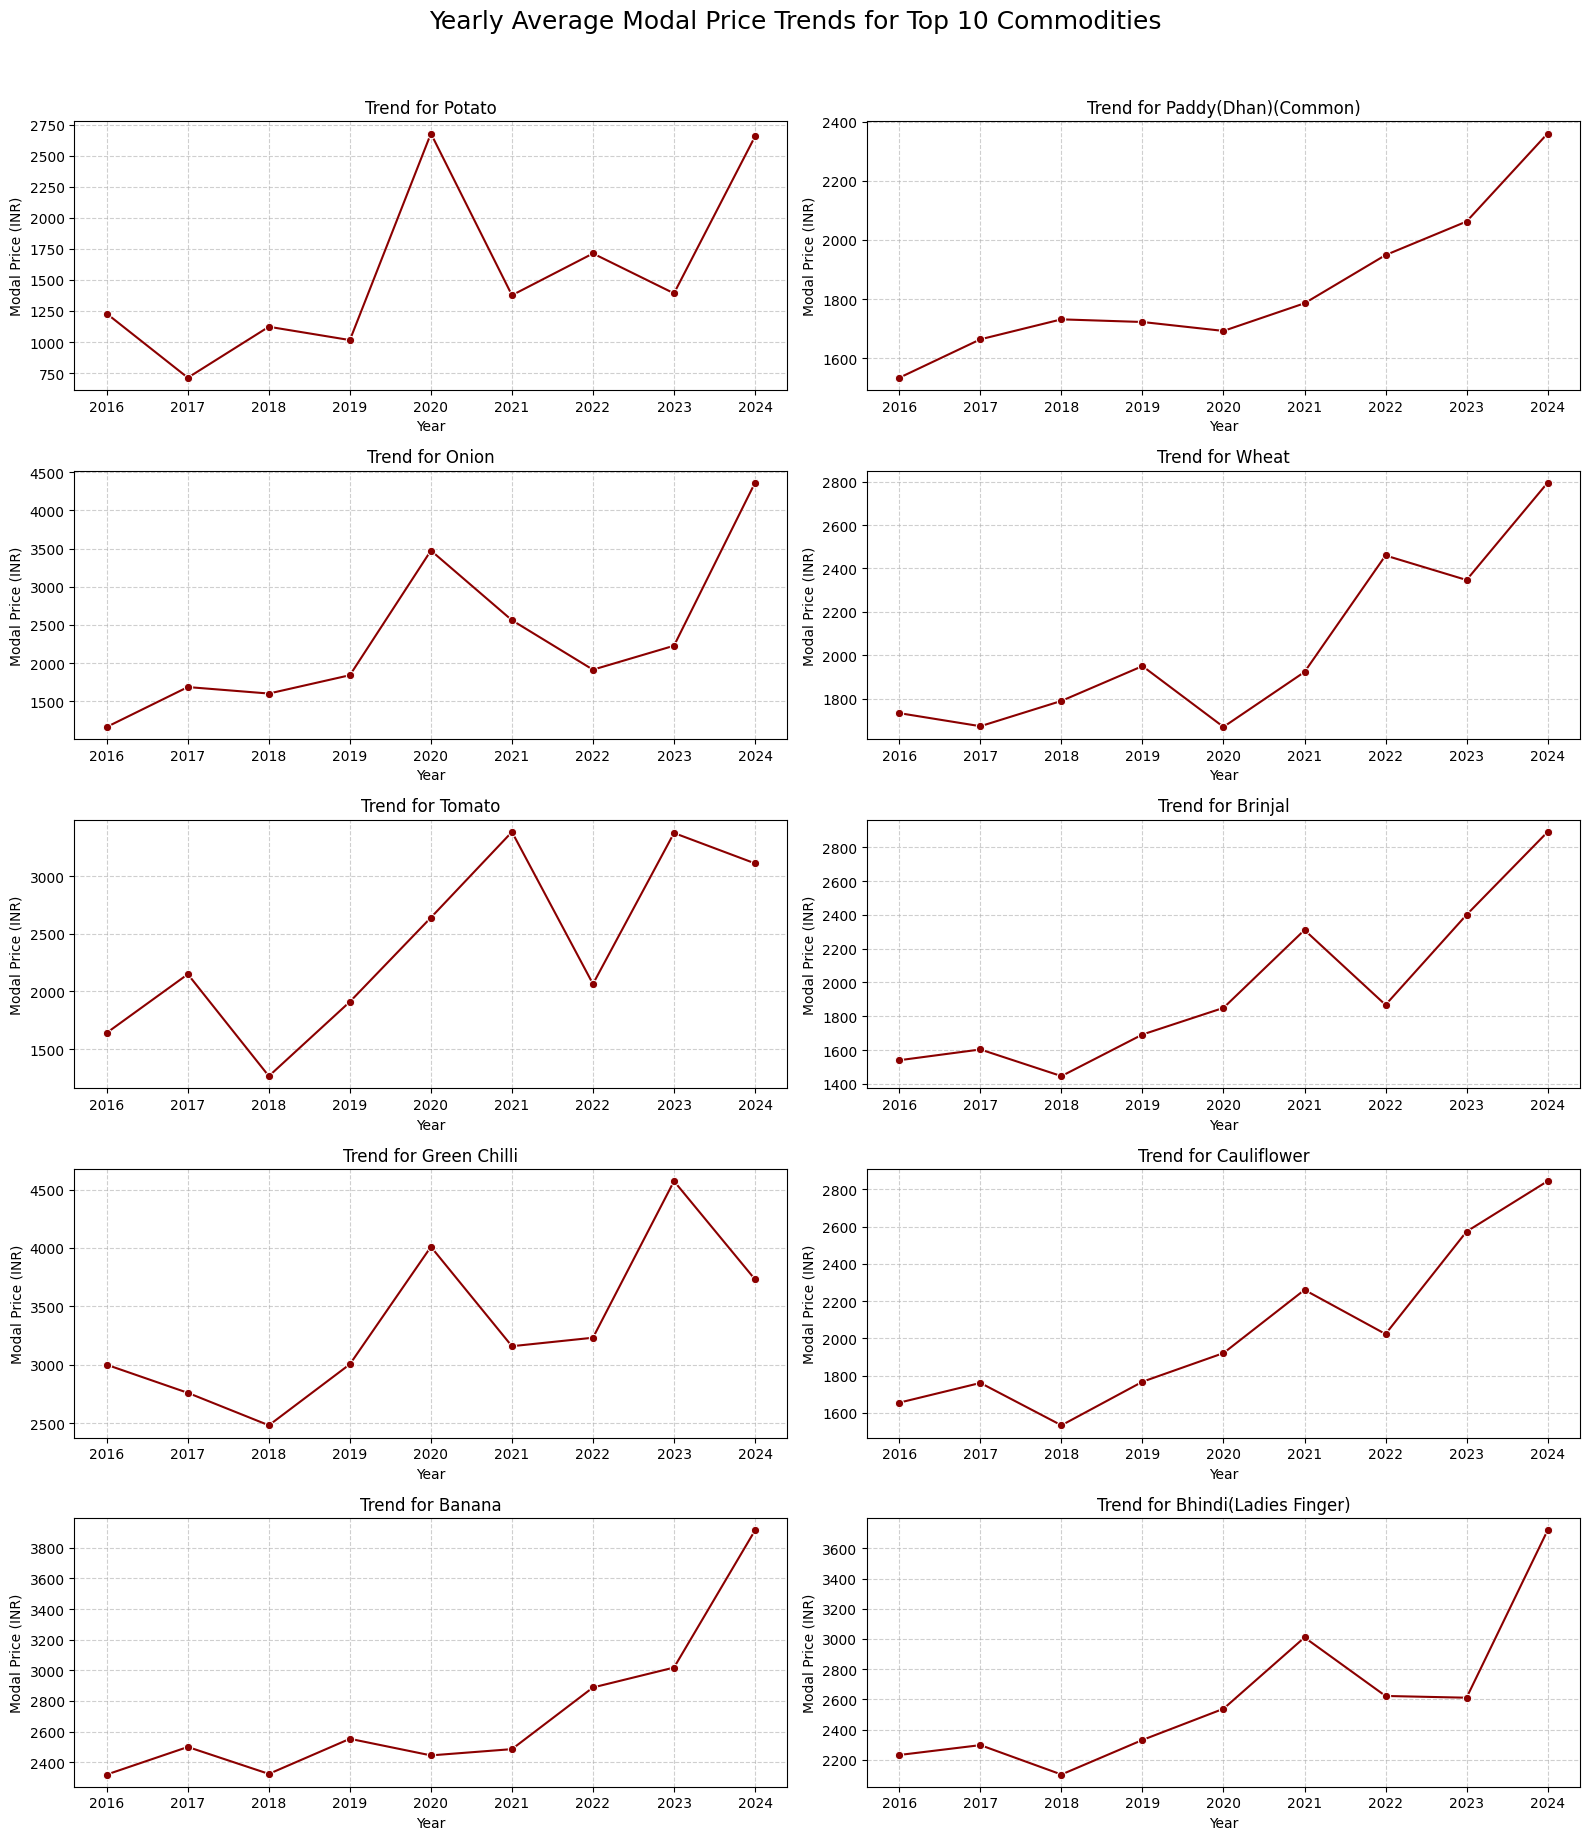

In [23]:
# Identify top 10 commodities by frequency
top10_commodities = df_cleaned['Commodity Name'].value_counts().nlargest(10).index.tolist()

# Filter data
df_top10 = df_cleaned[df_cleaned['Commodity Name'].isin(top10_commodities)]

# Group by Year and Commodity, get average modal price
trend_data = df_top10.groupby(['Year', 'Commodity Name'])['Modal_Price'].mean().reset_index()

# Plot subplots
fig, axes = plt.subplots(5, 2, figsize=(16, 18))  # 5 rows, 2 columns
axes = axes.flatten()

for i, commodity in enumerate(top10_commodities):
    ax = axes[i]
    temp = trend_data[trend_data['Commodity Name'] == commodity]
    sns.lineplot(data=temp, x='Year', y='Modal_Price', marker='o', ax=ax, color='darkred')
    ax.set_title(f"Trend for {commodity}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Modal Price (INR)")
    ax.grid(True, linestyle='--', alpha=0.6)

# Hide any unused subplots
for j in range(len(top10_commodities), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Yearly Average Modal Price Trends for Top 10 Commodities", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


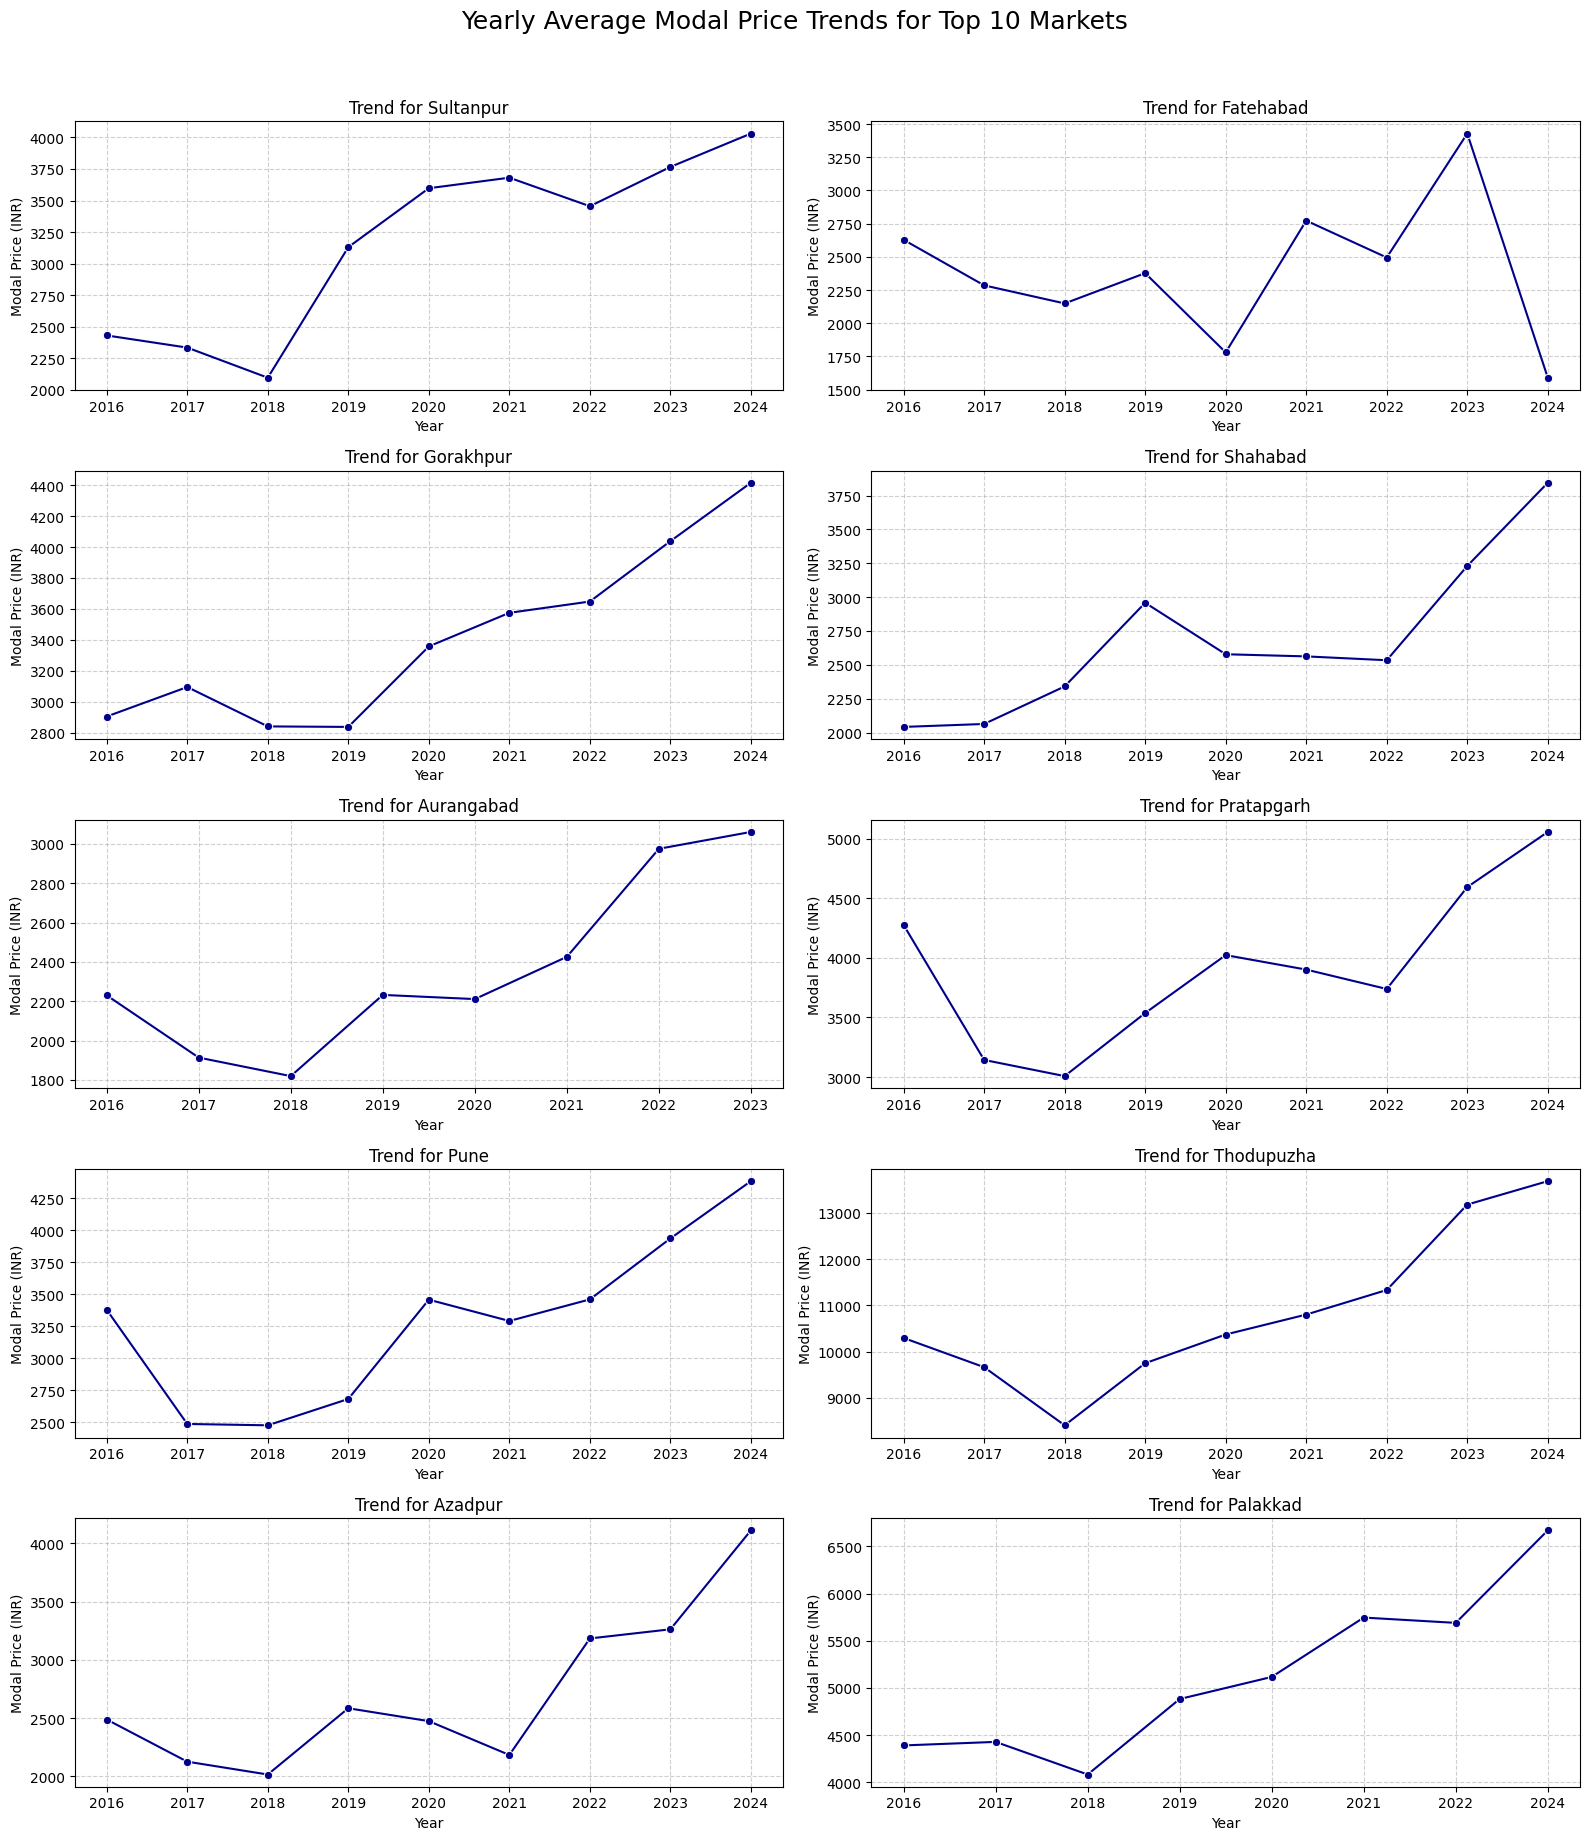

In [24]:
# Find top 10 markets by frequency
top10_markets = df_cleaned['Market Name'].value_counts().nlargest(10).index.tolist()

# Filter data for top 10 markets
df_top10_markets = df_cleaned[df_cleaned['Market Name'].isin(top10_markets)]

# Group by Year and Market
market_trend = df_top10_markets.groupby(['Year', 'Market Name'])['Modal_Price'].mean().reset_index()

# Plot subplots
fig, axes = plt.subplots(5, 2, figsize=(16, 18))  # 5 rows × 2 columns
axes = axes.flatten()

for i, market in enumerate(top10_markets):
    ax = axes[i]
    temp = market_trend[market_trend['Market Name'] == market]
    sns.lineplot(data=temp, x='Year', y='Modal_Price', marker='o', ax=ax, color='darkblue')
    ax.set_title(f"Trend for {market}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Modal Price (INR)")
    ax.grid(True, linestyle='--', alpha=0.6)

# Hide unused subplots
for j in range(len(top10_markets), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Yearly Average Modal Price Trends for Top 10 Markets", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

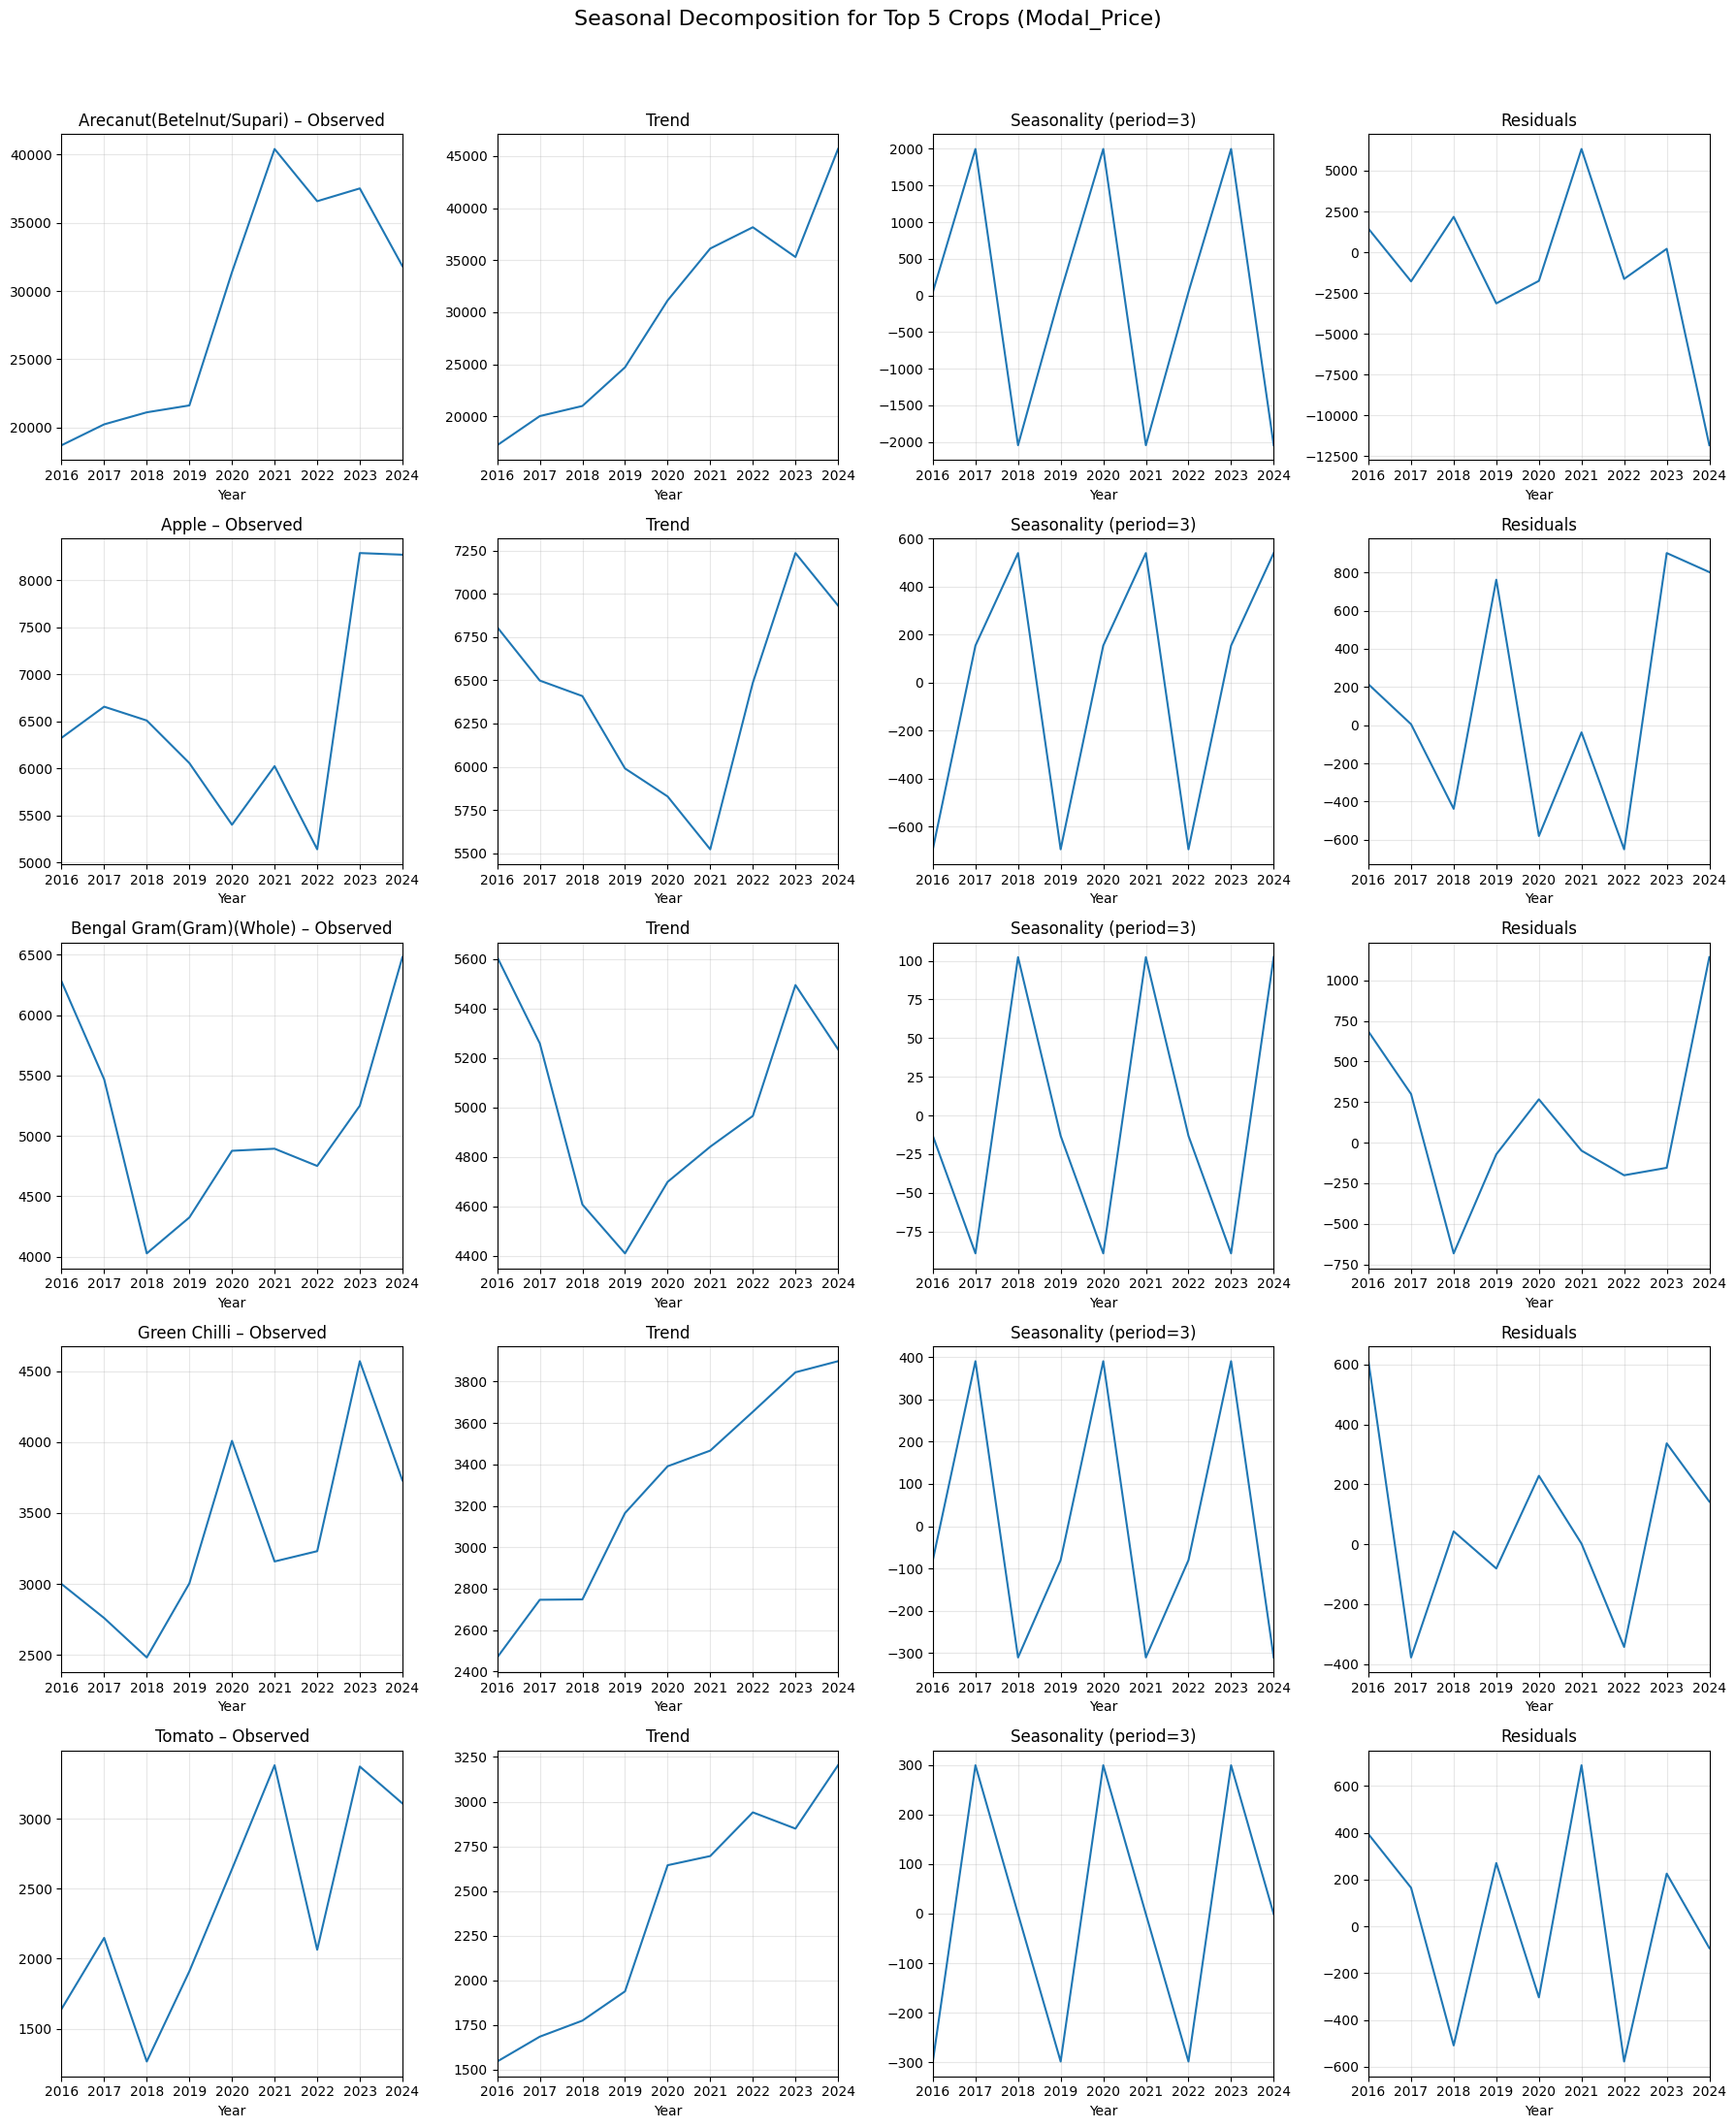

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure proper dtypes (cheap & safe)
df_cleaned = df_cleaned.copy()
df_cleaned['Year'] = pd.to_datetime(df_cleaned['Year'].astype(str))

# Top 5 commodities by total modal price
top5 = (
    df_cleaned.groupby('Commodity Name')['Modal_Price']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index.tolist()
)

# Aggregate to yearly mean price per commodity
agg = (
    df_cleaned[df_cleaned['Commodity Name'].isin(top5)]
    .groupby(['Commodity Name', 'Year'])['Modal_Price']
    .mean()
    .reset_index()
)

# pick a sensible period for yearly data
def pick_period(n):
    # For yearly data, keep it small
    if n >= 10: return 4
    if n >= 6:  return 3
    return 2

# Plot: 5 rows × 4 cols
fig, axes = plt.subplots(5, 4, figsize=(18, 22))
fig.suptitle("Seasonal Decomposition for Top 5 Crops (Modal_Price)", fontsize=16, y=0.995)

for i, crop in enumerate(top5):
    ax_obs, ax_trend, ax_seas, ax_res = axes[i]

    # Build clean, sorted series
    ts = (
        agg[agg['Commodity Name'] == crop]
        .set_index('Year')
        .sort_index()['Modal_Price']
    )

    # Need at least (period*2+1) points typically; skip if too short
    period = pick_period(len(ts))
    if len(ts) < max(5, period*2 + 1):
        for ax in (ax_obs, ax_trend, ax_seas, ax_res):
            ax.axis('off')
        ax_obs.text(0.02, 0.5, f"{crop}\nNot enough points for decomposition.",
                    fontsize=11, va='center')
        continue

    # Decompose (additive on yearly series)
    result = seasonal_decompose(ts, model='additive', period=period, extrapolate_trend='freq')

    result.observed.plot(ax=ax_obs);  ax_obs.set_title(f"{crop} – Observed")
    result.trend.plot(ax=ax_trend);   ax_trend.set_title("Trend")
    result.seasonal.plot(ax=ax_seas); ax_seas.set_title(f"Seasonality (period={period})")
    result.resid.plot(ax=ax_res);     ax_res.set_title("Residuals")

    for ax in (ax_obs, ax_trend, ax_seas, ax_res):
        ax.grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [26]:
# Final save
final_df = df_cleaned.dropna().reset_index(drop=True)

# Optional: sort for consistency
final_df = final_df.sort_values(by=['Commodity Name', 'Year'])

# Save to CSV locally
output_path = "market_price_cleaned.csv"
final_df.to_csv(output_path, index=False)

print(f"File saved successfully: {output_path}")

File saved successfully: market_price_cleaned.csv
